# Honey Production

#### In this project we are going to investigate the decline of the honeybee population and how the trends of the past predict the future for them.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Load the honey production data

hp_data = pd.read_csv('honeyproduction.csv')
hp_data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
# Calculate the mean of the total production per year

prod_per_year = hp_data.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [9]:
# Create a variable X for the column of years and reshape it

X = prod_per_year['year']
X = X.values.reshape(-1, 1)

In [10]:
# Create a variable y for the column of total production

y = prod_per_year['totalprod']

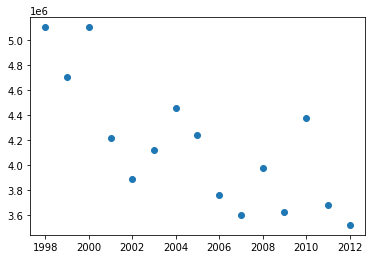

In [11]:
# Create a scatterplot of the variables

plt.scatter(X, y)
plt.show()

In [13]:
# Create a linear regression model and fit it with the variables

regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [16]:
# Print the slope (coef.) of the line and the intercept

regr.coef_[0], regr.intercept_

(-88303.18915238192, 181208083.10732976)

In [17]:
# Create a list that is the predictions

y_predict = regr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934684, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

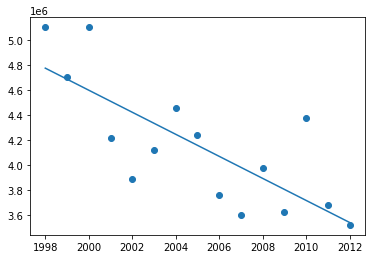

In [20]:
# Plot the line

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.show()

In [21]:
# Create a NumPy array that is the range from 2013 to 2050

X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1, 1)
X_future

array([[2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021],
       [2022],
       [2023],
       [2024],
       [2025],
       [2026],
       [2027],
       [2028],
       [2029],
       [2030],
       [2031],
       [2032],
       [2033],
       [2034],
       [2035],
       [2036],
       [2037],
       [2038],
       [2039],
       [2040],
       [2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047],
       [2048],
       [2049]])

In [22]:
# Create a future_predict list that is the y-values of the regr model prediction for the values of X_future

future_predict = regr.predict(X_future)
future_predict

array([3453763.34358495, 3365460.15443256, 3277156.96528018,
       3188853.77612782, 3100550.58697543, 3012247.39782304,
       2923944.20867065, 2835641.01951829, 2747337.8303659 ,
       2659034.64121351, 2570731.45206112, 2482428.26290876,
       2394125.07375637, 2305821.88460398, 2217518.69545159,
       2129215.50629923, 2040912.31714684, 1952609.12799445,
       1864305.93884209, 1776002.7496897 , 1687699.56053731,
       1599396.37138492, 1511093.18223256, 1422789.99308017,
       1334486.80392778, 1246183.61477539, 1157880.42562303,
       1069577.23647064,  981274.04731825,  892970.85816586,
        804667.6690135 ,  716364.47986111,  628061.29070872,
        539758.10155633,  451454.91240397,  363151.72325158,
        274848.53409919])

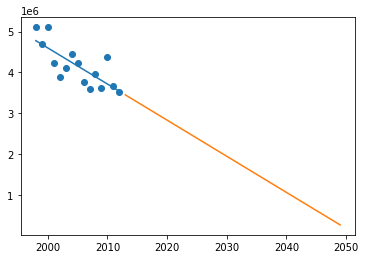

In [24]:
# Plot future prediction vs. the values for X_future

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()